# Paolo Frazzetto, Enrico Lorenzetti – Neutral Theory and emergent pattern in Ecology

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
df = pd.read_csv("./bci05.csv") # fetching data 
df = df[df['status']=='A'] # alive only

df['spID'] = df['sp'].astype('category') # encoding Species into numerical categories
df['spID'] = df['spID'].cat.codes.astype('category')

In [3]:
df.describe()

,tag,gx,gy,dbh,pom,date
count,208387.000000,208387.000000,208387.000000,208387.000000,208387.000000,208387.000000
mean,306594.348990,498.641919,251.377599,49.337660,1.090164,8913.200723
std,227313.670516,291.450721,144.082606,83.399585,0.350901,78.594292
min,2.000000,0.000000,0.000000,10.000000,0.000000,8768.000000
25%,119760.500000,241.300000,127.200000,16.000000,1.000000,8841.000000
50%,238542.000000,498.700000,251.000000,25.000000,1.000000,8917.000000
75%,502728.500000,752.200000,377.100000,47.000000,1.000000,8979.000000
max,749571.000000,999.900000,499.900000,2765.000000,5.000000,9154.000000


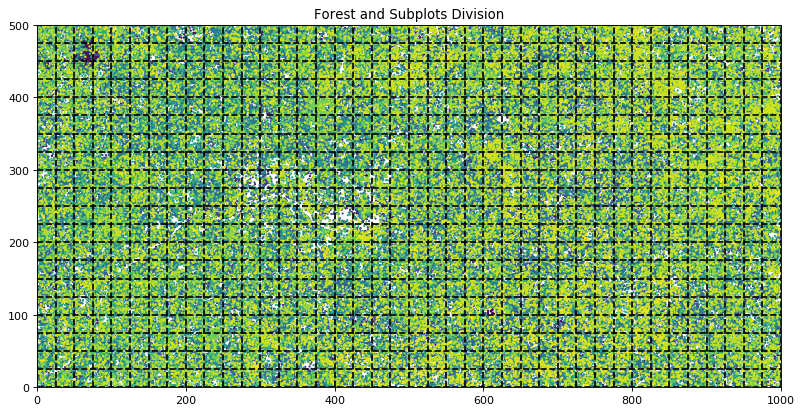

In [6]:
# Plot subdivisions 20x40
plt.figure(figsize=(12, 6), dpi=80,frameon=False)
plt.scatter(df['gx'],df['gy'],c=df['spID'],s=1,cmap='viridis')
plt.xlim(0,1000)
plt.ylim(0,500)
xcoords = [25*j for j in range(41)]
for xc in xcoords:
    plt.axvline(x=xc,linestyle='--',color='k')
ycoords = [25*j for j in range(21)]
for yc in ycoords:
    plt.axhline(y=yc,linestyle='--', color='k')
plt.title("Forest and Subplots Division")
plt.savefig('./Images/Subplots.png',dpi=100,bbox_inches='tight')
plt.show('tight')

### Task 1

In [4]:
def Subplot(x,y,n=800):
    sub_length = np.sqrt(500000/n) # division in 800 subsets
    xpos = np.floor(x / sub_length)
    ypos = np.floor(y / sub_length)
    return xpos+ypos*40 # +1 if counting from 1 to 800

df['Subplot'] = Subplot(df['gx'],df['gy']).astype('int')

In [12]:
df

,tag,sp,gx,gy,dbh,pom,date,codes,status,spID,Subplot
0,105951,ACACME,610.0,104.7,119.0,1,8924.0,M,A,0,184
1,132160,ACACME,534.8,241.3,116.0,1,8922.0,*,A,0,381
4,191542,ACACME,282.7,177.5,75.0,1,8825.0,*,A,0,291
5,269064,ACACME,84.2,74.8,21.0,1,8783.0,*,A,0,83
6,272540,ACACME,149.9,389.8,20.0,1,8833.0,*,A,0,605
7,422989,ACACME,450.8,216.8,21.0,1,8890.0,*,A,0,338
8,430127,ACACME,606.4,105.6,43.0,1,8924.0,*,A,0,184
9,430131,ACACME,606.1,103.1,26.0,1,8924.0,*,A,0,184
10,430132,ACACME,606.3,102.4,59.0,1,8924.0,*,A,0,184
11,530056,ACACME,612.6,107.6,51.0,1,8924.0,*,A,0,184


In [5]:
abundances = df.groupby(['Subplot','spID']).size()
abundances = abundances.unstack('spID') # N*S matrix,where each row represents the statistics of abundances in one subplot
display(abundances)
#abundances = abundances.stack(level=0) # create N*S vector

spID,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
Subplot,,,,,,,,,,,,,,,,,,,,,
0,NaN,16.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,15.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,22.0,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN


### Task 2

In [8]:
X_freq = np.bincount(X)
abundances.max()

spID
0       13.0
1       19.0
2        7.0
3        8.0
4        3.0
5       13.0
6        1.0
7        7.0
8        3.0
9       47.0
10       4.0
11       2.0
12     328.0
13       4.0
14      23.0
15       9.0
16       8.0
17       2.0
18       1.0
19       2.0
20       3.0
21       9.0
22       5.0
23       8.0
24       4.0
25       4.0
26       1.0
27       1.0
28      16.0
29      33.0
       ...  
269     61.0
270      1.0
271      2.0
272     25.0
273      1.0
274      3.0
275      7.0
276      4.0
277      7.0
278     80.0
279      1.0
280      6.0
281      4.0
282      4.0
283      8.0
284      3.0
285      1.0
286     12.0
287      2.0
288      4.0
289      6.0
290      1.0
291      6.0
292     27.0
293      3.0
294      7.0
295     13.0
296      4.0
297      1.0
298      2.0
Length: 299, dtype: float64

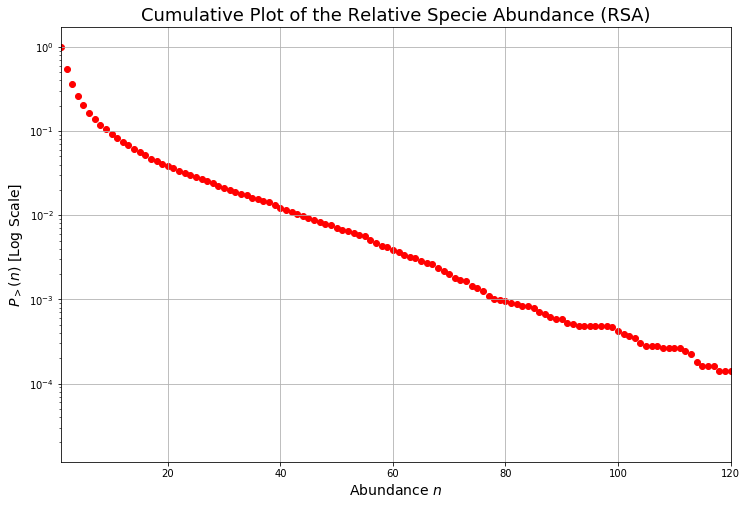

In [16]:
X      = abundances.stack(level=0).astype('int').values
X_freq = np.bincount(X)#[:120] # keep 120 most abundant species for plot
cdf    = 1 - np.cumsum(X_freq)/np.sum(X_freq)

plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(np.arange(1,cdf.shape[0]+1),cdf, c='red')
plt.semilogy(np.arange(1,cdf.shape[0]+1),cdf, alpha=0)
plt.xlim(1,120)
#plt.ylim(0,1)
plt.ylabel('$P_>(n)$ [Log Scale]',fontsize=14)
plt.xlabel('Abundance $n$', fontsize=14)
plt.title("Cumulative Plot of the Relative Specie Abundance (RSA)", fontsize=18)
plt.savefig('./Images/RSA.png',dpi=100,bbox_inches='tight')
plt.show()

### Task 3

In [17]:
def P0(b, d):
    m = 0.05
    r = b/d
    return b/(b-m*np.log(1-r))

def Pn(n, b, d):
    m   = 0.05
    r   = b/d
    p0  = b/(b-m*np.log(1-r))
    out = np.empty(n.shape)
    out = p0*(m/b)*(r**n)/n
    #out[np.isinf(out)] = p0
    return out

In [18]:
n_points = 120
prob     = np.empty(n_points)
xdata    = np.arange(0,n_points)
prob = Pn(xdata[1:100],0.5,0.5) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [19]:
def Pn_staz(n, m=0.05):
    return - (1-m)**n / (n*np.log(m))

In [20]:
cdf_th = 1 - np.cumsum(Pn_staz(np.arange(1,120)))
cdf_th, cdf

(array([6.82882209e-01, 5.32251259e-01, 4.36851657e-01, 3.68879440e-01,
        3.17220556e-01, 2.76323939e-01, 2.43022408e-01, 2.15340510e-01,
        1.91964686e-01, 1.71978356e-01, 1.54717434e-01, 1.39686049e-01,
        1.26504680e-01, 1.14876829e-01, 1.04566802e-01, 9.53844335e-02,
        8.71743160e-02, 7.98080162e-02, 7.31783464e-02, 6.71950693e-02,
        6.17816282e-02, 5.68726214e-02, 5.24118282e-02, 4.83506477e-02,
        4.46468512e-02, 4.12635755e-02, 3.81685047e-02, 3.53331988e-02,
        3.27325389e-02, 3.03442663e-02, 2.81485963e-02, 2.61278937e-02,
        2.42663980e-02, 2.25499895e-02, 2.09659896e-02, 1.95029897e-02,
        1.81507033e-02, 1.68998384e-02, 1.57419866e-02, 1.46695263e-02,
        1.36755387e-02, 1.27537335e-02, 1.18983841e-02, 1.11042699e-02,
        1.03666261e-02, 9.68109835e-03, 9.04370344e-03, 8.45079338e-03,
        7.89902402e-03, 7.38532674e-03, 6.90688320e-03, 6.46110263e-03,
        6.04560150e-03, 5.65818517e-03, 5.29683139e-03, 4.959675

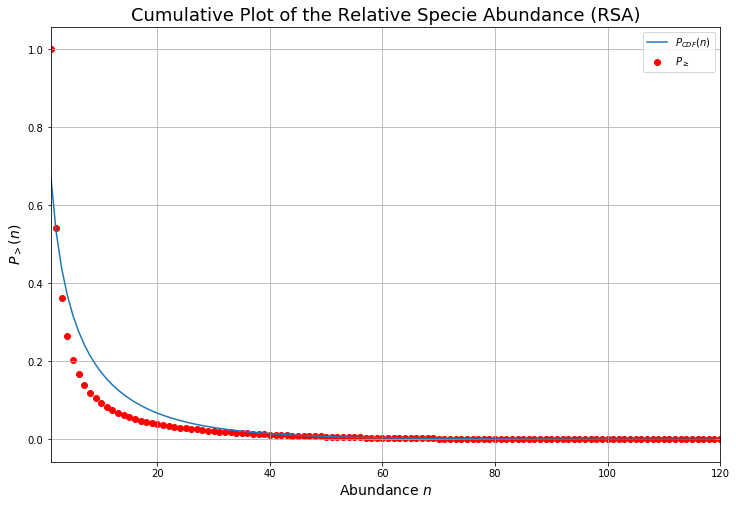

In [26]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(np.arange(1,cdf.shape[0]+1),cdf, c='red', label="$P_{\geq}$")
plt.plot(np.arange(1,cdf_th.shape[0]+1),cdf_th, alpha=1, label="$P_{CDF}(n)$")
plt.xlim(1,120)
plt.legend()
#plt.ylim(0,1)
plt.ylabel('$P_>(n)$',fontsize=14)
plt.xlabel('Abundance $n$', fontsize=14)
plt.title("Cumulative Plot of the Relative Specie Abundance (RSA)", fontsize=18)
plt.savefig('./Images/RSA_CDF.png',dpi=100,bbox_inches='tight')
plt.show()